In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
img_id = "CA184632V0333"

<h4>Load the shapefiles with the georeferenced images</h4>

In [73]:
import src.display.display_shapes as ds

import src.load.load_shape_data as lsd


path_sat_shapefile = "/data_1/ATM/data_1/georef/sat.shp"

# load the shapefile with the images
georef_shape_data = lsd.load_shape_data(path_sat_shapefile)

# get the geometry
georef_shapes = georef_shape_data.geometry

# get the unique ids from the shapes
georef_ids = georef_shape_data['image_id'].tolist()

print(georef_ids)


['CA184632V0342', 'CA184632V0341', 'CA184632V0315', 'CA184632V0316', 'CA184632V0328', 'CA184632V0328', 'CA184632V0328', 'CA184632V0325', 'CA181732V0013', 'CA181732V0013', 'CA181232V0065', 'CA181232V0065']


In [74]:
# Filter out geo-referenced images and footprints that don't match the flight path
filtered_georef_ids = []
filtered_georef_shapes = []
for i, geo_id in enumerate(georef_ids):
    if geo_id[2:6] == img_id[2:6]:
        filtered_georef_ids.append(geo_id)
        filtered_georef_shapes.append(georef_shapes[i])

# Replace the original lists with the filtered lists
georef_ids = filtered_georef_ids
georef_shapes = filtered_georef_shapes

print(georef_ids)
print(georef_shapes)


['CA184632V0342', 'CA184632V0341', 'CA184632V0315', 'CA184632V0316', 'CA184632V0328', 'CA184632V0328', 'CA184632V0328', 'CA184632V0325']
[<POLYGON ((-1928216.548 754552.786, -1920582.542 751343.235, -1922828.377 74...>, <POLYGON ((-1930626.799 755375.804, -1923431.574 752279.633, -1925822.161 74...>, <POLYGON ((-2002679.058 780838.193, -1994665.424 779258.359, -1996685.796 77...>, <POLYGON ((-1991856.846 777964.719, -1993772.337 770537.256, -2001806.09 772...>, <POLYGON ((-1965625.82 768820.412, -1957821.679 765721.045, -1960359.984 758...>, <POLYGON ((-1965625.82 768820.412, -1957821.679 765721.045, -1960359.984 758...>, <POLYGON ((-1965625.82 768820.412, -1957821.679 765721.045, -1960359.984 758...>, <POLYGON ((-1974293.258 772082.478, -1966821.337 769396.369, -1968861.509 76...>]


POINT (-1953165.9705795082 759866.1051023415)
POLYGON ((-1955814.182514017 764861.5353859696, -1948070.4459207156 761837.3064160463, -1950518.1808806527 754870.7094411331, -1958261.1534904705 757894.6400459252, -1955814.182514017 764861.5353859696))


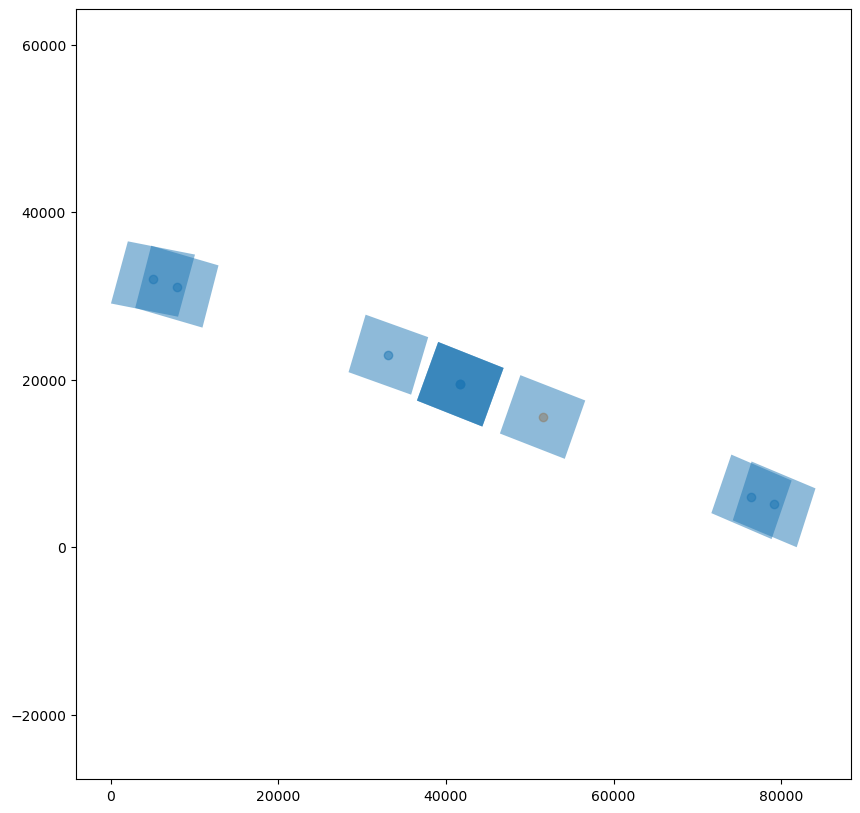

In [87]:
import src.georef.georef_calc as gc

GCalc = gc.GeorefCalc()

GCalc.georeference(None, img_id, georef_ids, georef_shapes)
